# Game of Life

Based on [drsfenner.org "Game of Life in Numpy"](http://drsfenner.org/blog/2015/08/game-of-life-in-numpy-2/) and the notebook [http://drsfenner.org/public/notebooks/GameOfLife.ipynb](http://drsfenner.org/public/notebooks/GameOfLife.ipynb).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time
from IPython import display
import pandas as pd

%matplotlib inline

# radCAD Modules
from radcad import Model, Simulation, Experiment
from radcad.engine import Engine, Backend

# radCAD Model
from game_of_life import loop, state_update_full, state_update_board

In [2]:
from celluloid import Camera
from IPython.display import HTML

def animate_board(result, file=None):
    fig = plt.figure(figsize=(8, 8))
    fig.set_tight_layout(True)

    fig = plt.figure()
    camera = Camera(fig)

    def update(timestep):
        state = result.iloc[timestep]
        plt.imshow(state['board'], cmap="binary", interpolation="none")
        plt.axis('off')

    for timestep in range(len(result)):
        update(timestep)
        camera.snap()

    animation = camera.animate()

    if file:
        animation.save(file, writer='pillow')
    # Set to local ffmpeg executable file
    plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'
    return HTML(animation.to_html5_video())

In [3]:
board_size = (10, 10)
nd_slice = (slice(1, -1),) * len(board_size)

def generate_new_board():
    full_size = tuple(i+2 for i in board_size)
    full = np.zeros(full_size, dtype=np.uint8)
    board = full[nd_slice]
    return full, board

full, board = generate_new_board()

ruleOfLifeAlive = np.zeros(8+1, np.uint8)
ruleOfLifeAlive[[2,3]] = 1

ruleOfLifeDead = np.zeros(8+1, np.uint8)
ruleOfLifeDead[3] = 1

params = {
    'dims': [len(board.shape)],
    'nd_slice': [nd_slice],
    'ruleOfLifeAlive': [ruleOfLifeAlive],
    'ruleOfLifeDead': [ruleOfLifeDead]
}

initial_state = {
    'full': full,
    'board': board,
}

state_update_blocks = [
    {
        'policies': {
            'loop': loop
        },
        'variables': {
            'full': state_update_full,
            'board': state_update_board
        }
    }
]

In [4]:
TIMESTEPS = 10
RUNS = 1

model = Model(initial_state=initial_state, state_update_blocks=state_update_blocks, params=params)
simulation = Simulation(model=model, timesteps=TIMESTEPS, runs=RUNS)

<Figure size 576x576 with 0 Axes>

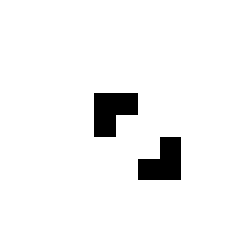

In [5]:
full, board = generate_new_board()

board[4:6, 4:6] = 1
board[6:8, 6:8] = 1

model.initial_state = {
    'full': full,
    'board': board,
}
simulation.model = model

result = simulation.run()
df = pd.DataFrame(result)

animate_board(df)

<Figure size 576x576 with 0 Axes>

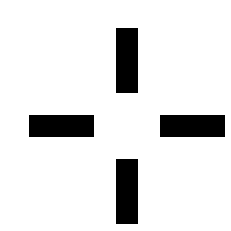

In [6]:
full, board = generate_new_board()

board[4, 5] = 1
board[5, 4:7] = 1
board[6, 5] = 1

model.initial_state = {
    'full': full,
    'board': board,
}
simulation.model = model

result = simulation.run()
df = pd.DataFrame(result)

animate_board(df)

FileNotFoundError: [Errno 2] No such file or directory: './game-of-life/game-of-life.gif'

<Figure size 576x576 with 0 Axes>

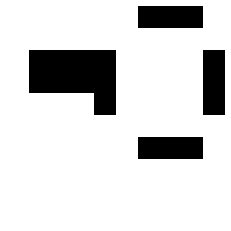

In [7]:
full, board = generate_new_board()

board[1, 7] = 1
board[2, 1:3] = 1
board[3, 2] = 1
board[3, 6:9] = 1

model.initial_state = {
    'full': full,
    'board': board,
}
simulation.model = model

result = simulation.run()
df = pd.DataFrame(result)

animate_board(df, file='game-of-life.gif')

## Gosper Glider Gun

In [ ]:
board_size = (50, 50)
nd_slice = (slice(1, -1),) * len(board_size)

def generate_new_board():
    full_size = tuple(i+2 for i in board_size)
    full = np.zeros(full_size, dtype=np.uint8)
    board = full[nd_slice]
    return full, board

full, board = generate_new_board()

ruleOfLifeAlive = np.zeros(8+1, np.uint8)
ruleOfLifeAlive[[2,3]] = 1

ruleOfLifeDead = np.zeros(8+1, np.uint8)
ruleOfLifeDead[3] = 1

params = {
    'dims': [len(board.shape)],
    'nd_slice': [nd_slice],
    'ruleOfLifeAlive': [ruleOfLifeAlive],
    'ruleOfLifeDead': [ruleOfLifeDead]
}

initial_state = {
    'full': full,
    'board': board,
}

state_update_blocks = [
    {
        'policies': {
            'loop': loop
        },
        'variables': {
            'full': state_update_full,
            'board': state_update_board
        }
    }
]

In [ ]:
import io

# Source: https://www.conwaylife.com/patterns/gosperglidergun.cells
cells = '''
........................O
......................O.O
............OO......OO............OO
...........O...O....OO............OO
OO........O.....O...OO
OO........O...O.OO....O.O
..........O.....O.......O
...........O...O
............OO
'''

string = io.StringIO(cells)

for row, line in enumerate(string):
    for column, char in enumerate(line):
        if char == 'O':
            board[row, column] = 1

In [ ]:
TIMESTEPS = 100
RUNS = 1

model = Model(initial_state=initial_state, state_update_blocks=state_update_blocks, params=params)
simulation = Simulation(model=model, timesteps=TIMESTEPS, runs=RUNS)

result = simulation.run()
df = pd.DataFrame(result)

animate_board(df, file='gosper-glider-gun.gif')